# Downloading Dataset

Download dataset dari repository UCI

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00553/e-shop%20data%20and%20description.zip

--2021-09-05 11:35:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/00553/e-shop%20data%20and%20description.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 795262 (777K) [application/x-httpd-php]
Saving to: ‘e-shop data and description.zip.1’

e-shop data and des 100%[===================>] 776.62K  --.-KB/s    in 0.05s   

2021-09-05 11:35:46 (13.9 MB/s) - ‘e-shop data and description.zip.1’ saved [795262/795262]



Ekstrak file yang telah didownload

In [ ]:
!unzip -q /content/e-shop data and description.zip

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing

Baca File csv lalu reduksi data dengan menggunakan masking

In [54]:
shop_df = pd.read_csv('/content/e-shop clothing 2008.csv', sep=';')
shop_df = shop_df.loc[(shop_df['price 2'] == 2) & 
                      (shop_df['page'] == 1) & 
                      ~(shop_df['month'] == 8) & 
                      ~(shop_df['month'] == 7) &
                      ~(shop_df['month'] == 6) &
                      ~(shop_df['day'] == 1) &
                      ~(shop_df['day'] == 2) &
                      ~(shop_df['day'] == 5) &
                      ~(shop_df['day'] == 3) &
                      ~(shop_df['day'] == 4) &
                      ~(shop_df['day'] == 10) &
                      ((shop_df['country'] >= 30) & 
                       (shop_df['country'] <= 42)) &
                      ~(shop_df['day'] == 31)]

shop_df

,year,month,day,order,country,session ID,page 1 (main category),page 2 (clothing model),colour,location,model photography,price,price 2,page
14832,2008,4,7,1,41,2163,1,A2,3,1,1,43,2,1
17271,2008,4,9,8,34,2492,2,B15,9,5,1,38,2,1
20154,2008,4,11,7,41,2923,3,C14,9,5,1,23,2,1
20157,2008,4,11,10,41,2923,2,B12,2,4,1,38,2,1
20226,2008,4,11,2,41,2934,1,A12,2,4,1,38,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82570,2008,5,30,1,41,11933,1,A12,2,4,1,38,2,1
82574,2008,5,30,5,41,11933,4,P8,2,3,1,28,2,1
82576,2008,5,30,7,41,11933,1,A12,2,4,1,38,2,1
82758,2008,5,30,2,34,11972,1,A13,1,5,1,28,2,1


Menggunakan library sklearn.preprocessing, pertama melakukan *label encoding* pada feature yang akan digunakan. Setelah itu, melakukan 2 normalisasi pada feature dengan *standard deviation scaling* dan *min max scaling*.

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

atr = ['country', 'page 1 (main category)', 'price']

le = LabelEncoder()
page2_encode = le.fit_transform(shop_df['page 2 (clothing model)'].values)
shop_df['page 2 (clothing model)'] = pd.Series(page2_encode)

attribute_to_cluster = shop_df[atr]

std_scaler = StandardScaler()
minMax_scale = MinMaxScaler()

shop_std_scale = std_scaler.fit_transform(attribute_to_cluster)
shop_minMax_scale = minMax_scale.fit_transform(attribute_to_cluster)


In [56]:
shop_minMax_scale[:5]

array([[0.90909091, 0.        , 0.8       ],
       [0.27272727, 0.33333333, 0.6       ],
       [0.90909091, 0.66666667, 0.        ],
       [0.90909091, 0.33333333, 0.6       ],
       [0.90909091, 0.        , 0.6       ]])

Membuat DataFrame yang akan digunakan untuk klasterisasi.

In [57]:
data_cluster_std = pd.DataFrame(shop_std_scale)
data_cluster_minMax = pd.DataFrame(shop_minMax_scale)

data_cluster_std.columns = atr
data_cluster_minMax.columns = atr

data_cluster_minMax

,country,page 1 (main category),price
0,0.909091,0.000000,0.8
1,0.272727,0.333333,0.6
2,0.909091,0.666667,0.0
3,0.909091,0.333333,0.6
4,0.909091,0.000000,0.6
...,...,...,...
189,0.909091,0.000000,0.6
190,0.909091,1.000000,0.2
191,0.909091,0.000000,0.6
192,0.272727,0.000000,0.2


# K-Means

Menggunakan library sklearn.cluster import fungsi *KMeans*. Pada grafik elbow di bawah, digunakan nilai 2, 3, dan 4sebagai k untuk parameter *Kmeans*.

Text(0, 0.5, 'Inertia')

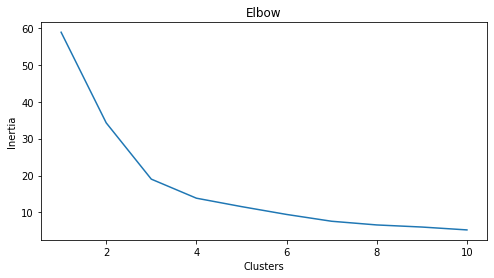

In [58]:
from sklearn.cluster import KMeans

clusters = []
for i in range (1,11):
    km = KMeans(n_clusters=i).fit(data_cluster_minMax)
    clusters.append(km.inertia_)

# tampilkan plot
fig, ax = plt.subplots(figsize=(8,4))
sns.lineplot(x=list(range(1,11)), y=clusters, ax=ax)
ax.set_title('Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

Menggunakan k = [2, 3, 4] untuk melakukan train model menggunakan algoritma *KMeans*.

In [63]:
std_cluster = data_cluster_std.copy()
minMax_cluster = data_cluster_minMax.copy()
## Melatih model
# Create Model
model_kmeans2 = KMeans(n_clusters=2)
model_kmeans3 = KMeans(n_clusters=3)
model_kmeans4 = KMeans(n_clusters=4)

# Train Model
model_kmeans2.fit(data_cluster_minMax)
model_kmeans3.fit(data_cluster_minMax)
model_kmeans4.fit(data_cluster_minMax)

# Menambah Label pada data
std_cluster['cluster_kmeans2'] = model_kmeans2.labels_
std_cluster['cluster_kmeans3'] = model_kmeans3.labels_
std_cluster['cluster_kmeans4'] = model_kmeans4.labels_

# std_cluster[atr] = std_scaler.inverse_transform(std_cluster[atr].values)
std_cluster

,country,page 1 (main category),price,cluster_kmeans2,cluster_kmeans3,cluster_kmeans4
0,1.120616,-0.720784,0.990701,0,0,1
1,-0.735233,0.263949,0.239935,0,1,3
2,1.120616,1.248683,-2.012362,1,2,2
3,1.120616,0.263949,0.239935,0,0,1
4,1.120616,-0.720784,0.239935,0,0,1
...,...,...,...,...,...,...
189,1.120616,-0.720784,0.239935,0,0,1
190,1.120616,2.233416,-1.261596,1,2,2
191,1.120616,-0.720784,0.239935,0,0,1
192,-0.735233,-0.720784,-1.261596,0,1,3


Pada 3 grafik di bawah, klasterisasi menggambarkan negara - negara tertentu yang memiliki kecenderungan membeli produk - produk dari kategori tertentu. Dapat dilihat juga klasterisasi di bawah menggambarkan harga produk untuk masing - masing kategori.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


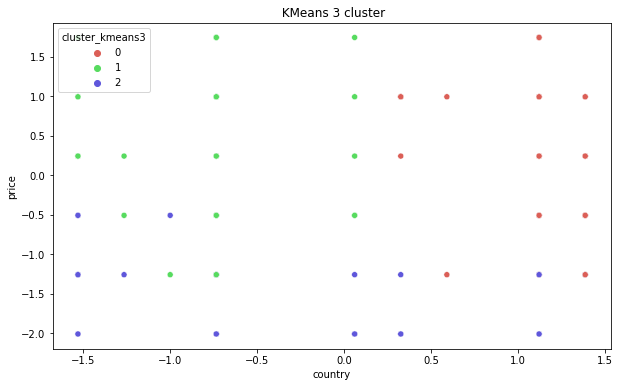

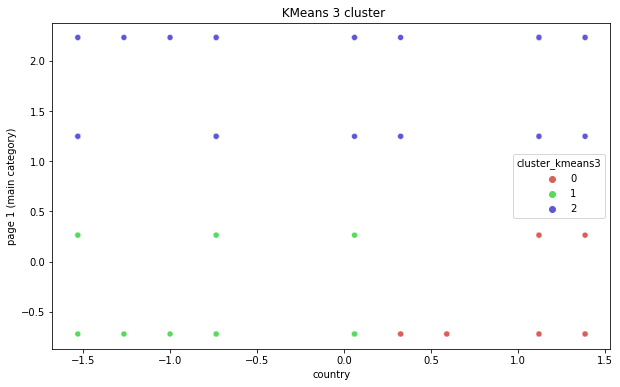

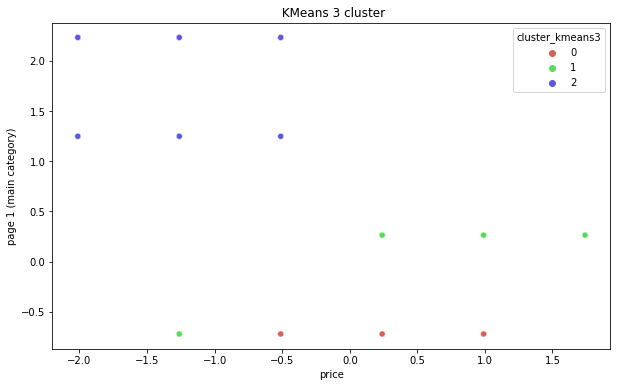

In [64]:
# plt.figure(figsize=(8,4))
# sns.scatterplot(std_cluster['country'], std_cluster['page 1 (main category)'], hue=std_cluster['cluster_kmeans2'], palette=sns.color_palette('hls',2))
# plt.title(' KMeans 2 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(std_cluster['country'], std_cluster['price'], 
                hue=std_cluster['cluster_kmeans3'], 
                palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(std_cluster['country'], std_cluster['page 1 (main category)'], 
                hue=std_cluster['cluster_kmeans3'], 
                palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(std_cluster['price'], std_cluster['page 1 (main category)'], 
                hue=std_cluster['cluster_kmeans3'], 
                palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

# plt.figure(figsize=(8,4))
# sns.scatterplot(std_cluster['country'], std_cluster['page 1 (main category)'], hue=std_cluster['cluster_kmeans5'], palette=sns.color_palette('hls',5))
# plt.title(' KMeans 5 cluster')

plt.show()

# K-Medoids

In [65]:
!pip install scikit-learn-extra

In [93]:
from sklearn_extra.cluster import KMedoids

# shop_df_copy = data_cluster_std.copy()
# shop_clust_copy = std_cluster.copy()
model_scale_kmedoids3 = KMedoids(n_clusters=3, method='pam', random_state=0).fit(data_cluster_minMax)
minMax_cluster['cluster_kmedoids3'] = model_scale_kmedoids3.labels_
minMax_cluster

/usr/local/lib/python3.7/dist-packages/sklearn_extra/cluster/_k_medoids.py:247: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


,country,page 1 (main category),price,cluster_kmedoids2,cluster_kmedoids3,cluster_dbscan
0,0.909091,0.000000,0.8,0,1,0
1,0.272727,0.333333,0.6,0,2,2
2,0.909091,0.666667,0.0,1,0,-1
3,0.909091,0.333333,0.6,0,1,-1
4,0.909091,0.000000,0.6,0,1,0
...,...,...,...,...,...,...
189,0.909091,0.000000,0.6,0,1,0
190,0.909091,1.000000,0.2,1,0,-1
191,0.909091,0.000000,0.6,0,1,0
192,0.272727,0.000000,0.2,0,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' KMeans 3 cluster')

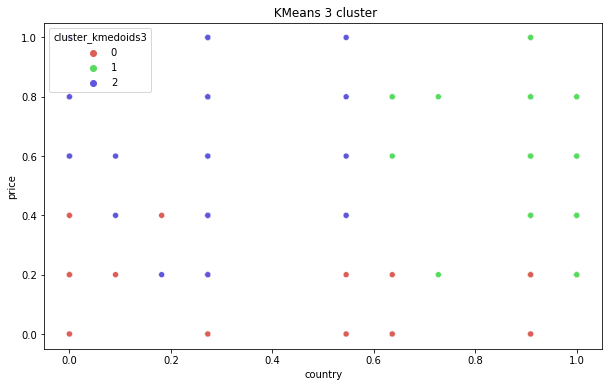

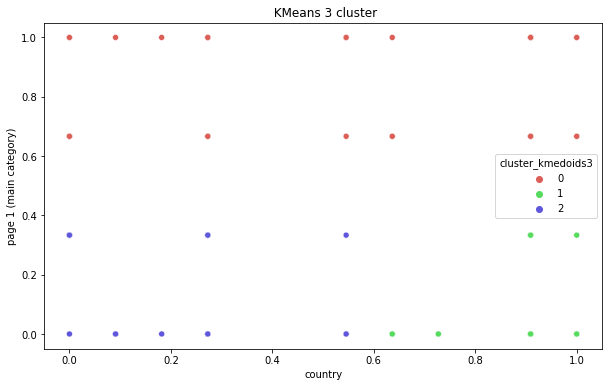

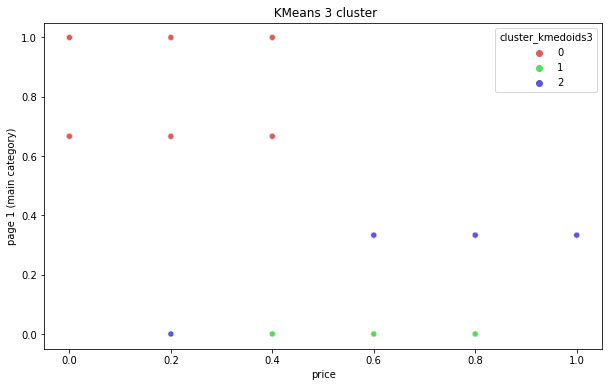

In [76]:
plt.figure(figsize=(10,6))
sns.scatterplot(minMax_cluster['country'], minMax_cluster['price'], 
                hue=minMax_cluster['cluster_kmedoids3'], 
                palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(minMax_cluster['country'], minMax_cluster['page 1 (main category)'], 
                hue=minMax_cluster['cluster_kmedoids3'], 
                palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(minMax_cluster['price'], minMax_cluster['page 1 (main category)'], 
                hue=minMax_cluster['cluster_kmedoids3'], 
                palette=sns.color_palette('hls',3))
plt.title(' KMeans 3 cluster')

# Single Linkage

In [77]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree



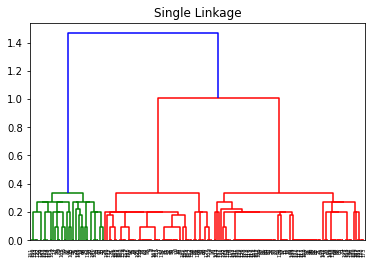

In [78]:
mergings_single = linkage(minMax_cluster, method="single", metric='euclidean')
dendrogram(mergings_single)
plt.title("Single Linkage")
plt.show()

# Complete Linkage

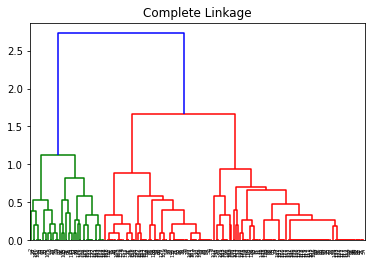

In [80]:
mergings_complete = linkage(minMax_cluster, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.title("Complete Linkage")
plt.show()

# DBSCAN

In [81]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

In [83]:
minMax_cluster.describe()
minMax_cluster.head()

,country,page 1 (main category),price,cluster_kmedoids2,cluster_kmedoids3
0,0.909091,0.000000,0.8,0,1
1,0.272727,0.333333,0.6,0,2
2,0.909091,0.666667,0.0,1,0
3,0.909091,0.333333,0.6,0,1
4,0.909091,0.000000,0.6,0,1


In [84]:
neighbors = NearestNeighbors(n_neighbors=15)
neighbors_fit = neighbors.fit(shop_minMax_scale)
distances, indices = neighbors_fit.kneighbors(shop_minMax_scale)
distances

array([[0.        , 0.        , 0.        , ..., 0.18181818, 0.2       ,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.2       , 0.2       ,
        0.27272727],
       [0.        , 0.2       , 0.2       , ..., 0.4       , 0.4       ,
        0.4       ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09090909, 0.09090909,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 0.27029216, 0.33820137,
        0.33820137],
       [0.        , 0.        , 0.        , ..., 0.2       , 0.2       ,
        0.2       ]])

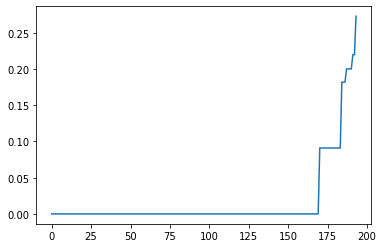

In [85]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [89]:
# create an object
db = DBSCAN(eps=0.23, min_samples=15, metric='euclidean')

# fit the model
db.fit(minMax_cluster)

DBSCAN(eps=0.23, min_samples=15)

In [90]:
minMax_cluster['cluster_dbscan'] = db.labels_
minMax_cluster

,country,page 1 (main category),price,cluster_kmedoids2,cluster_kmedoids3,cluster_dbscan
0,0.909091,0.000000,0.8,0,1,0
1,0.272727,0.333333,0.6,0,2,2
2,0.909091,0.666667,0.0,1,0,-1
3,0.909091,0.333333,0.6,0,1,-1
4,0.909091,0.000000,0.6,0,1,0
...,...,...,...,...,...,...
189,0.909091,0.000000,0.6,0,1,0
190,0.909091,1.000000,0.2,1,0,-1
191,0.909091,0.000000,0.6,0,1,0
192,0.272727,0.000000,0.2,0,2,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, ' KMeans 3 cluster')

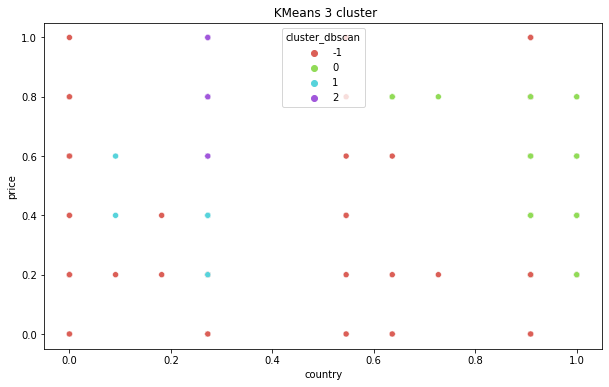

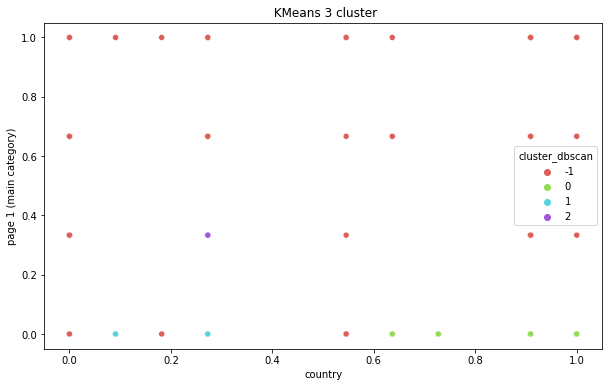

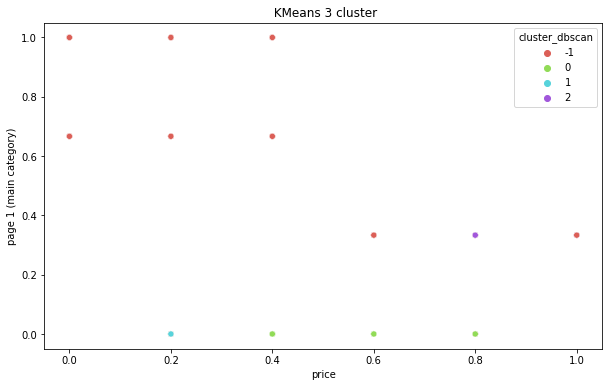

In [92]:
plt.figure(figsize=(10,6))
sns.scatterplot(minMax_cluster['country'], minMax_cluster['price'], 
                hue=minMax_cluster['cluster_dbscan'], 
                palette=sns.color_palette('hls',4))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(minMax_cluster['country'], minMax_cluster['page 1 (main category)'], 
                hue=minMax_cluster['cluster_dbscan'], 
                palette=sns.color_palette('hls',4))
plt.title(' KMeans 3 cluster')

plt.figure(figsize=(10,6))
sns.scatterplot(minMax_cluster['price'], minMax_cluster['page 1 (main category)'], 
                hue=minMax_cluster['cluster_dbscan'], 
                palette=sns.color_palette('hls',4))
plt.title(' KMeans 3 cluster')